In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### SAC

In [2]:
reward_train = np.genfromtxt('logs/csv/run-20201112-152302_train-tag-reward.csv', delimiter=',')
reward_test = np.genfromtxt('logs/csv/run-20201112-152302_test-tag-reward.csv', delimiter=',')

In [3]:
reward_test = reward_test[1:, :]

In [4]:
# Get Smoothed Training Reward
average = []
step_average = []

interval = 200
limit = 100
step = limit/2

# The 837th row corresponds to the 20000th episode
reward_headless = reward_train[1:, :]
average_tmp = 0
counter = 0

for i in range(reward_headless.shape[0]):
    if reward_headless[i, 1] < limit:
        average_tmp += reward_headless[i, 2]
        counter += 1
    else:
        average.append(average_tmp/counter)
        limit += interval
        counter = 0
        average_tmp = 0
        step_average.append(step)
        step += interval

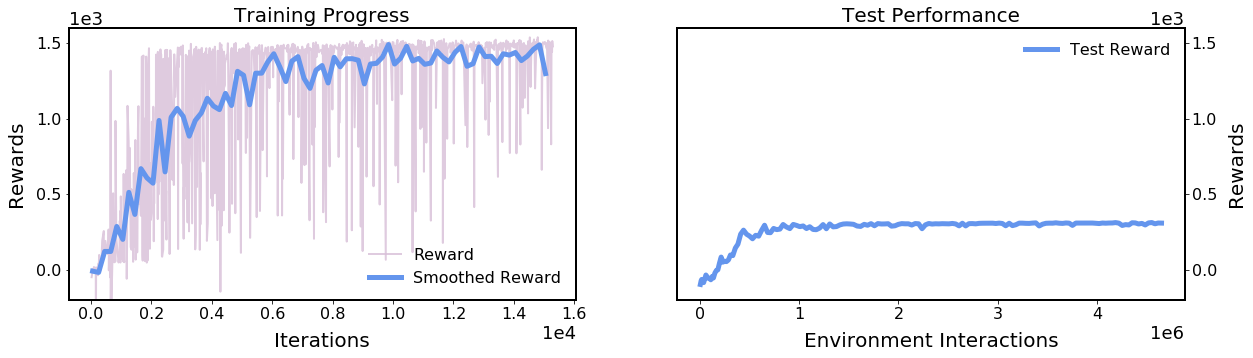

In [31]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(reward_train[:, 1], reward_train[:, 2], color='thistle', alpha=0.8, linewidth=2, label='Reward')
plt.plot(step_average, average, linewidth=5, color='cornflowerblue', label='Smoothed Reward')
plt.xlabel('Iterations', fontsize=20, labelpad=10)
plt.ylabel('Rewards', fontsize=20, labelpad=10)
plt.ylim([-200, 1600])
plt.title('Training Progress', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.grid()
plt.legend(fontsize=16, frameon=False)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax = plt.subplot(1, 2, 2)
plt.plot(reward_test[:, 1].astype(int), reward_test[:, 2], linewidth=5, color='cornflowerblue', label='Test Reward')
plt.ylim([-200, 1600])
plt.xlabel('Environment Interactions', fontsize=20, labelpad=10)
plt.ylabel('Rewards', fontsize=20, labelpad=10)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title('Test Performance', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.grid()
plt.legend(fontsize=16, frameon=False)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.show()
fig.savefig('img/bipedalwalkerharcore-v3.png', dpi=100, bbox_inches='tight')

In [24]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [23]:
fm._rebuild()